# 국가(대륙)별/상품군별

## K-Beauty는 성장하고 있을까?

# 필요 라이브러리 가져오기

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

/Users/a1100960/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/a1100960/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/a1100960/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/a1100960/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/a1100960/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size ch

In [3]:
import os

if os.name == "posix":
    sns.set(font="AppleGothic")
elif os.name == "nt":
    sns.set(font="Malgun Gothic")
    
%config InlineBackend.figure_format = "retina"

# 데이터 로드하기

In [5]:
df_raw = pd.read_csv("./data/cosmetic.csv", encoding="cp949")
df_raw.shape

(450, 27)

In [8]:
df_raw

,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,...,2017 3/4,2017 4/4,2018 1/4,2018 2/4,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4
0,합계,합계,계,148272,153641,163999,213216,269101,271784,268421,...,749612,858240,833672,897205,921586,974060,1250236,1344404,1525396,1879499
1,합계,합계,면세점,-,-,-,-,-,-,-,...,610630,677884,665613,725319,761836,770656,1070693,1157158,1336372,1655635
2,합계,합계,면세점 이외,-,-,-,-,-,-,-,...,138982,180356,168059,171886,159750,203404,179543,187246,189024,223864
3,합계,컴퓨터 및 주변기기,계,4915,4052,3912,3529,2903,2697,3804,...,2018,2158,5236,3854,4320,4511,3702,4038,3670,3826
4,합계,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,...,5,1,2,6,1,215,2,0,1,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,기타,생활용품 및 자동차용품,면세점,-,-,-,-,-,-,-,...,0,0,0,0,0,0,0,0,0,0
446,기타,생활용품 및 자동차용품,면세점 이외,-,-,-,-,-,-,-,...,567,634,665,469,504,589,465,488,308,531
447,기타,기 타,계,765,735,849,804,788,805,724,...,814,1101,1067,1063,1120,770,711,689,469,1094
448,기타,기 타,면세점,-,-,-,-,-,-,-,...,82,266,272,316,404,0,0,1,0,1


# 분석과 시각화를 위한 tidy data 만들기

In [12]:
df = df_raw.melt(id_vars=["국가(대륙)별", "상품군별", "판매유형별"],
                 var_name="기간", value_name="백만원")

df.shape

(10800, 5)

In [13]:
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원
0,합계,합계,계,2014 1/4,148272
1,합계,합계,면세점,2014 1/4,-
2,합계,합계,면세점 이외,2014 1/4,-
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  10800 non-null  object
 1   상품군별     10800 non-null  object
 2   판매유형별    10800 non-null  object
 3   기간       10800 non-null  object
 4   백만원      10800 non-null  object
dtypes: object(5)
memory usage: 422.0+ KB


# 데이터 전처리

## 기간에서 연도를 분리하기

In [18]:
df["연도"] = df['기간'].map(lambda x: int(x.split()[0]))

df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도
0,합계,합계,계,2014 1/4,148272,2014
1,합계,합계,면세점,2014 1/4,-,2014
2,합계,합계,면세점 이외,2014 1/4,-,2014
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014


In [22]:
df["분기"] = df["기간"].map(lambda x: int(x.split()[1].split("/")[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014 1/4,148272,2014,1
1,합계,합계,면세점,2014 1/4,-,2014,1
2,합계,합계,면세점 이외,2014 1/4,-,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014,1


## 금액을 수치데이터로 표현하기 위해 데이터 타입 변경하기

In [24]:
df["백만원"] = df["백만원"].replace("-", pd.np.nan).astype(float)
df.head()

/Users/a1100960/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014 1/4,148272.0,2014,1
1,합계,합계,면세점,2014 1/4,NaN,2014,1
2,합계,합계,면세점 이외,2014 1/4,NaN,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915.0,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1


## 필요없는 데이터 제거하기

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  10800 non-null  object 
 1   상품군별     10800 non-null  object 
 2   판매유형별    10800 non-null  object 
 3   기간       10800 non-null  object 
 4   백만원      7200 non-null   float64
 5   연도       10800 non-null  int64  
 6   분기       10800 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 590.8+ KB


In [30]:
df = df[(df["국가(대륙)별"] != "합계") & (df["상품군별"] != "합계")]

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9072 entries, 48 to 10799
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  9072 non-null   object 
 1   상품군별     9072 non-null   object 
 2   판매유형별    9072 non-null   object 
 3   기간       9072 non-null   object 
 4   백만원      6048 non-null   float64
 5   연도       9072 non-null   int64  
 6   분기       9072 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 567.0+ KB


In [32]:
df.isnull().sum()

국가(대륙)별       0
상품군별          0
판매유형별         0
기간            0
백만원        3024
연도            0
분기            0
dtype: int64

# K-Beauty 시각화

## 전체 상품군 판매액

In [34]:
df_total = df[df["판매유형별"] == "계"].copy()
df_total.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014 1/4,47.0,2014,1
57,미국,서 적,계,2014 1/4,962.0,2014,1
60,미국,사무·문구,계,2014 1/4,25.0,2014,1


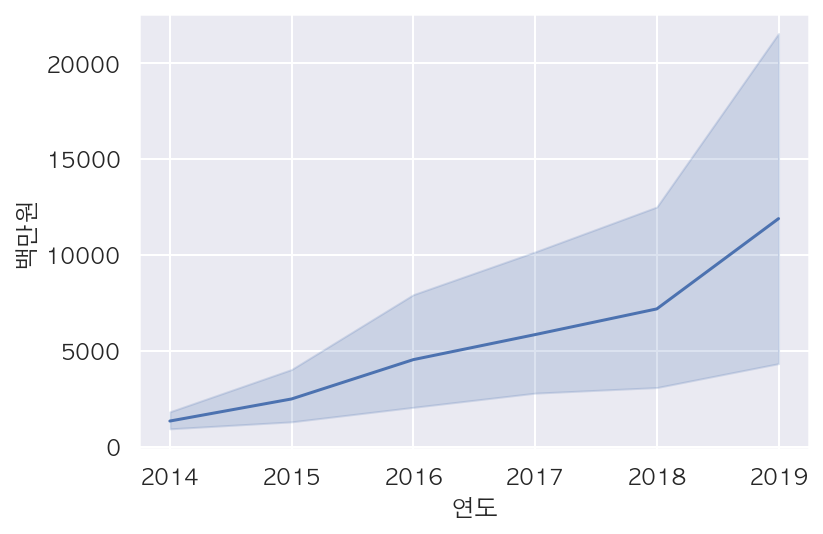

In [35]:
sns.lineplot(data=df_total, x="연도", y="백만원")

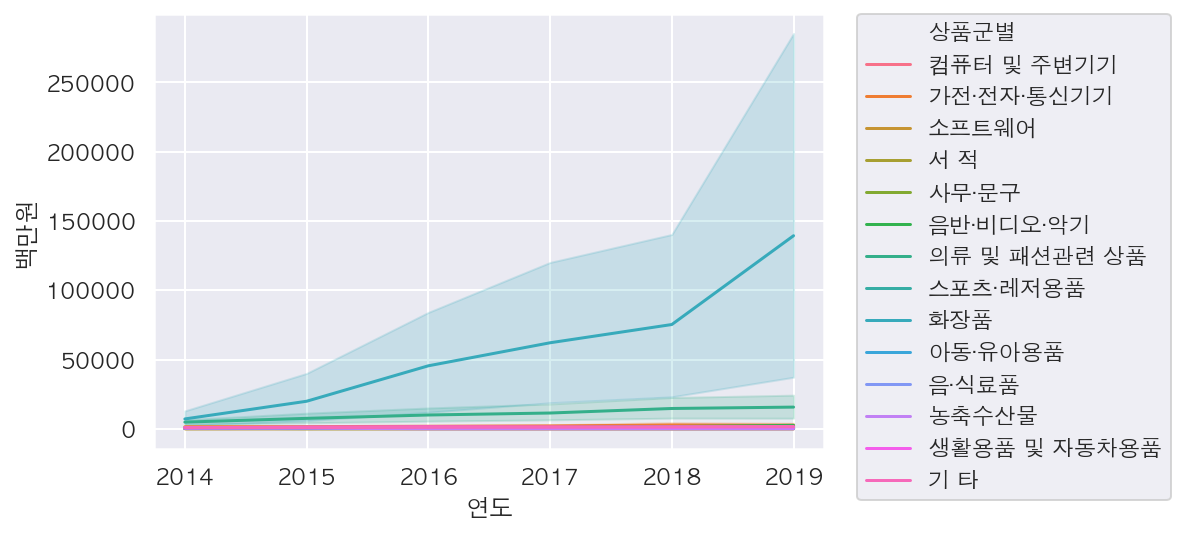

In [38]:
sns.lineplot(data=df_total, x="연도", y="백만원", hue="상품군별")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

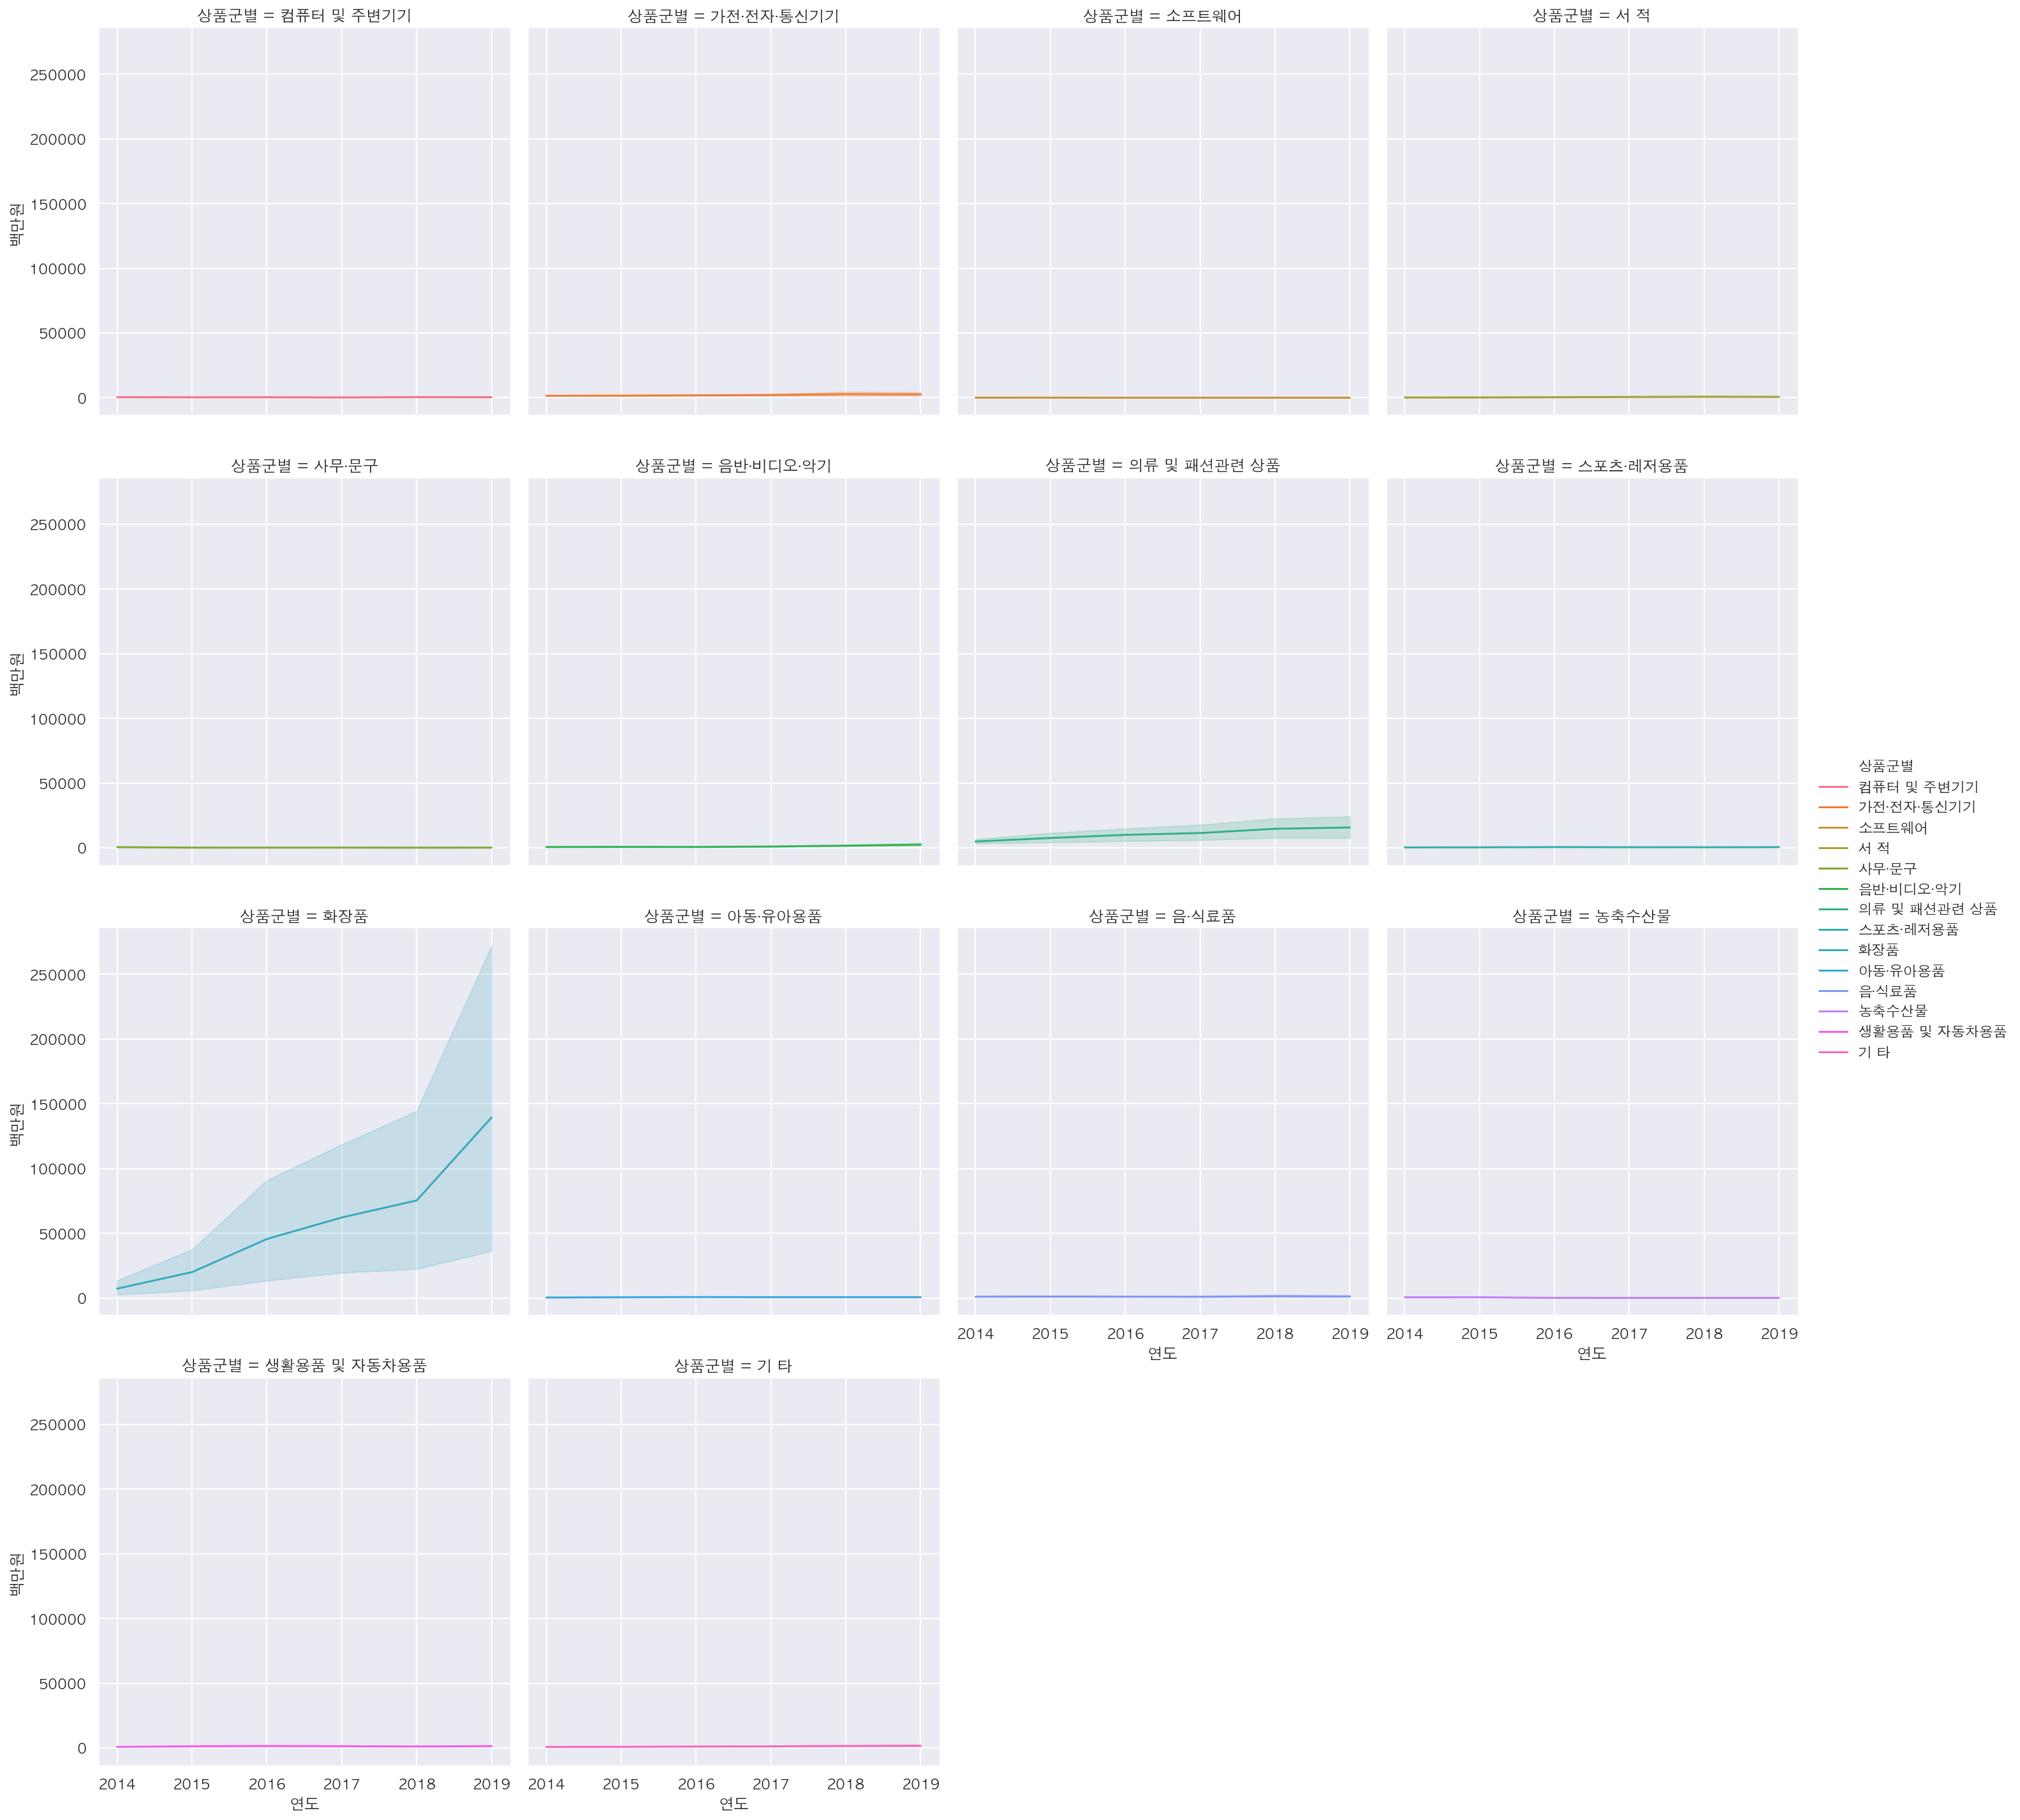

In [44]:
sns.relplot(data=df_total, x="연도", y="백만원", hue="상품군별", kind="line",
            col="상품군별", col_wrap=4)

In [51]:
df_sub = df_total[~df_total["상품군별"].isin(["화장품", "의류 및 패션관련 상품"])]

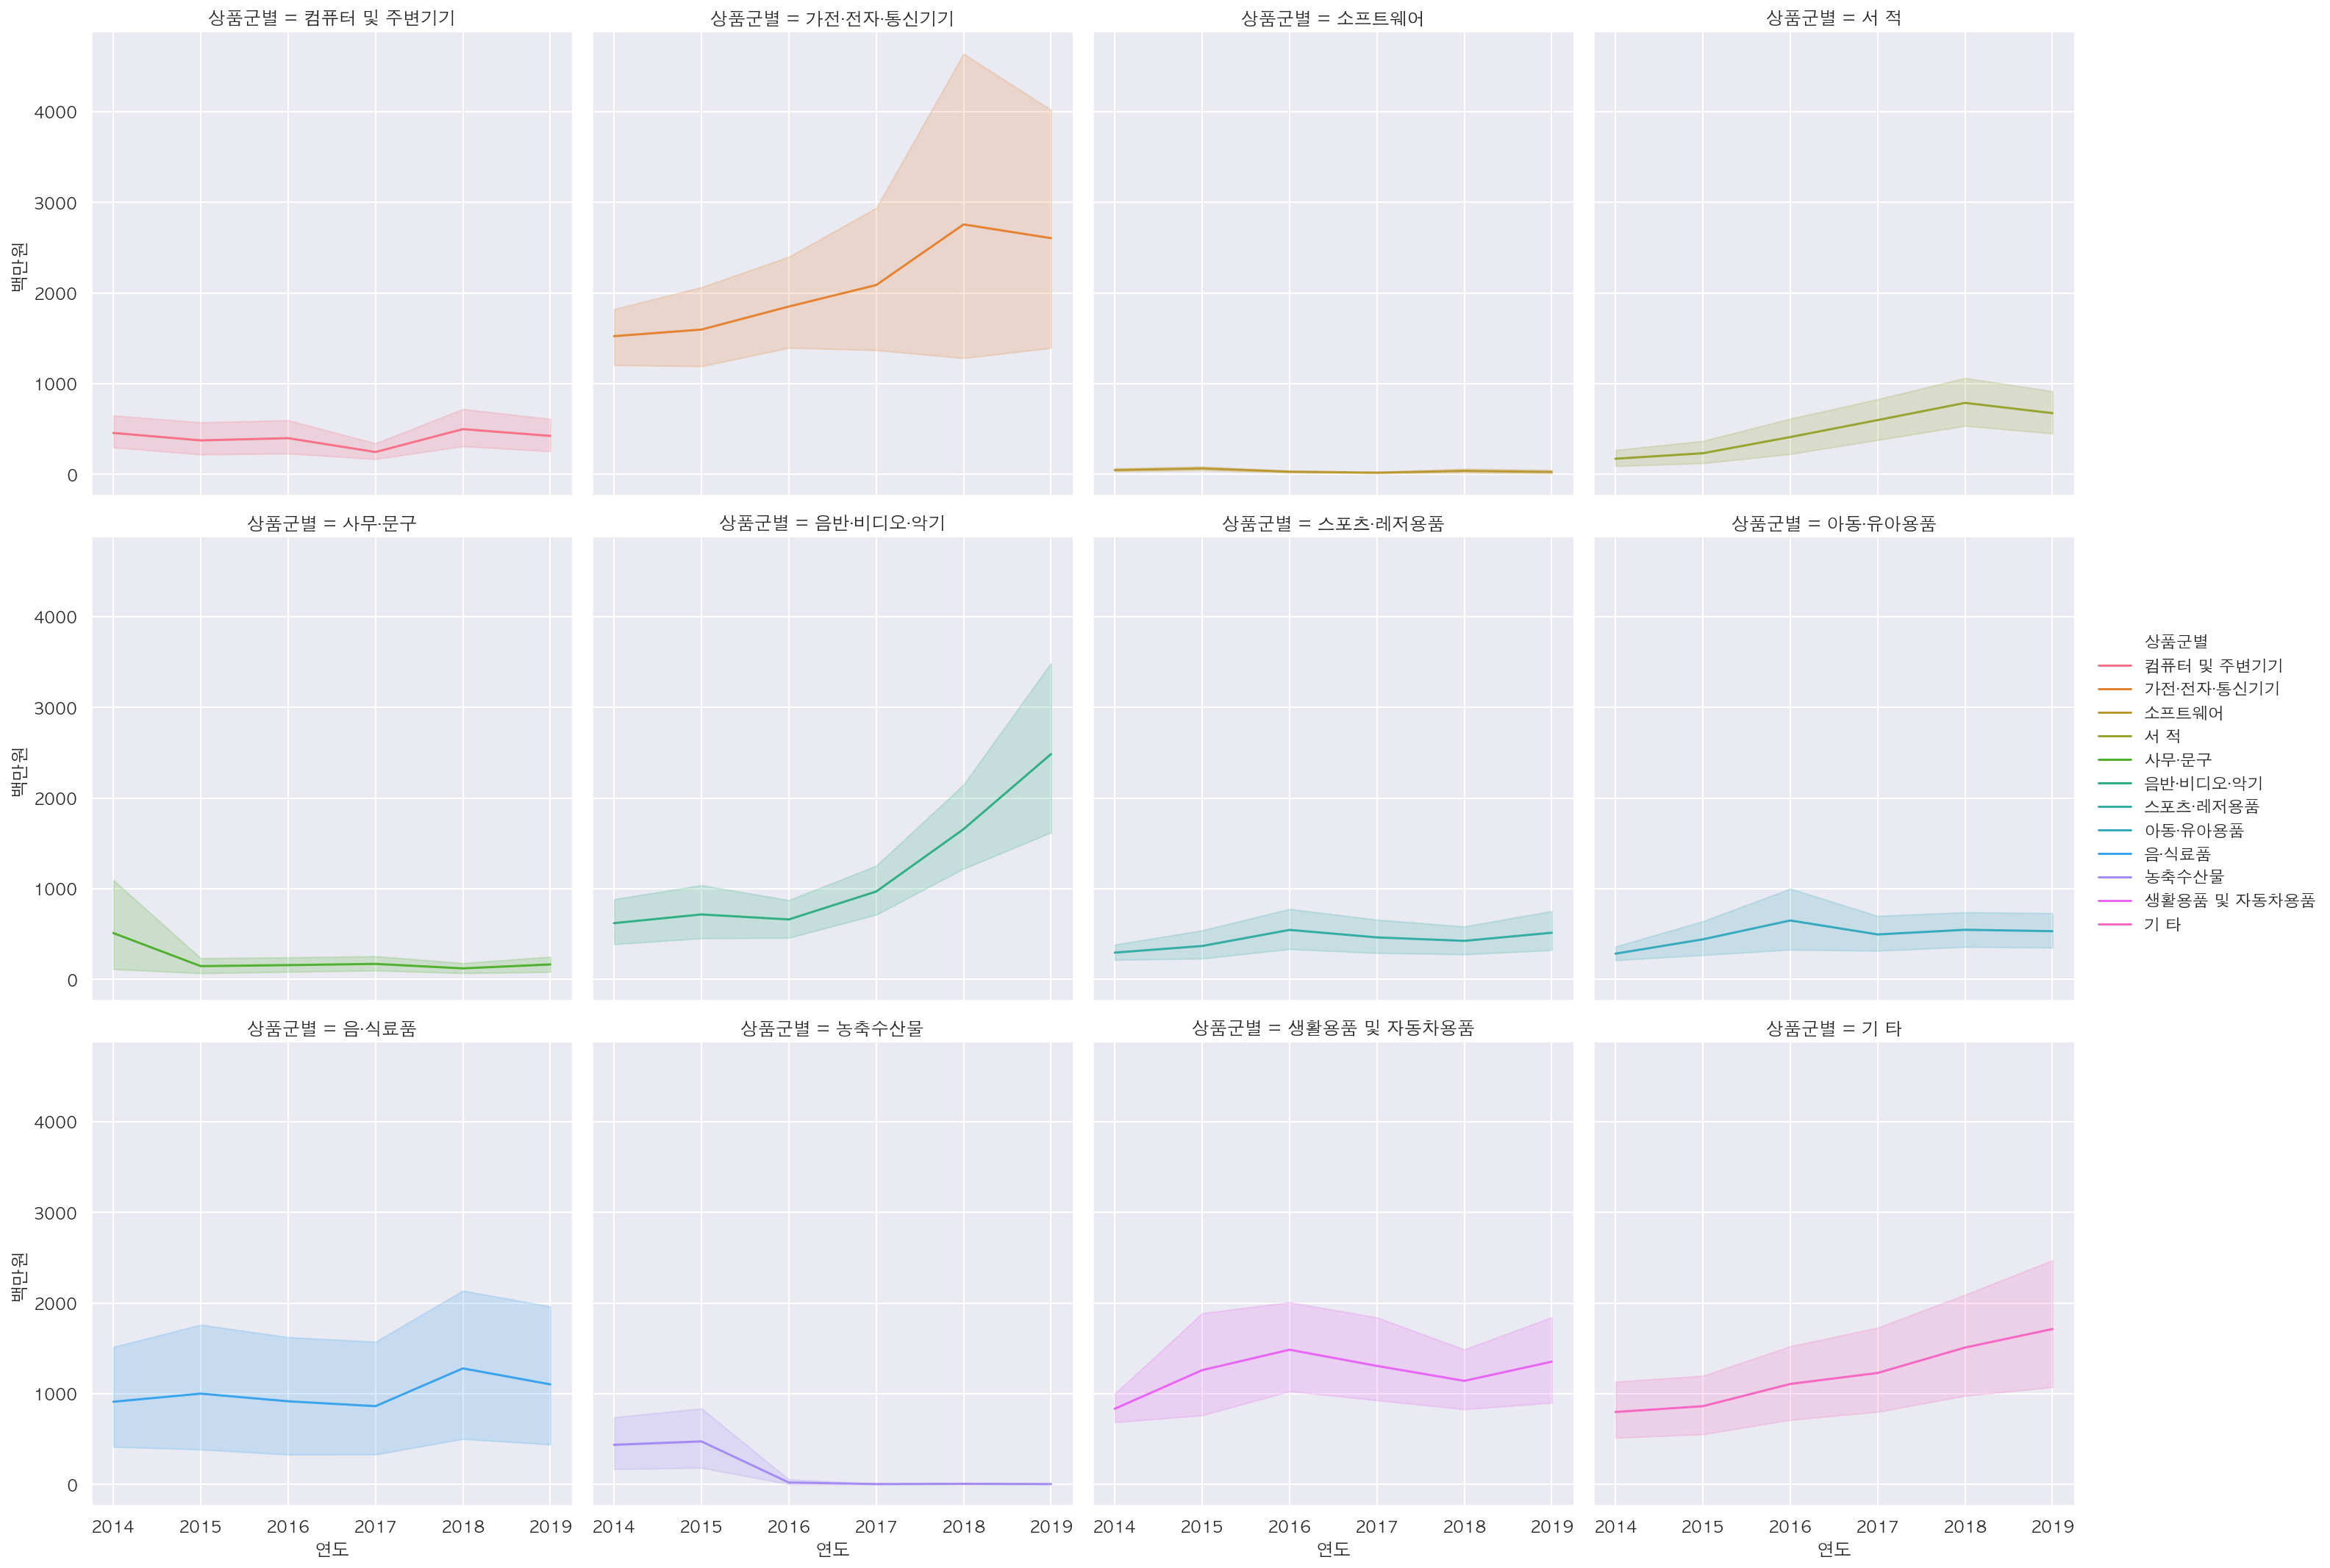

In [52]:
sns.relplot(data=df_sub, x="연도", y="백만원", hue="상품군별",
            col="상품군별", col_wrap=4, kind="line")

## 화장품의 온라인쇼핑 해외직접판매액

In [55]:
df_cosmetic = df_total[df_total["상품군별"] == "화장품"].copy()
df_cosmetic.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
72,미국,화장품,계,2014 1/4,3740.0,2014,1
117,중국,화장품,계,2014 1/4,32235.0,2014,1
162,일본,화장품,계,2014 1/4,1034.0,2014,1
207,아세안(ASEAN),화장품,계,2014 1/4,398.0,2014,1
252,EU,화장품,계,2014 1/4,937.0,2014,1


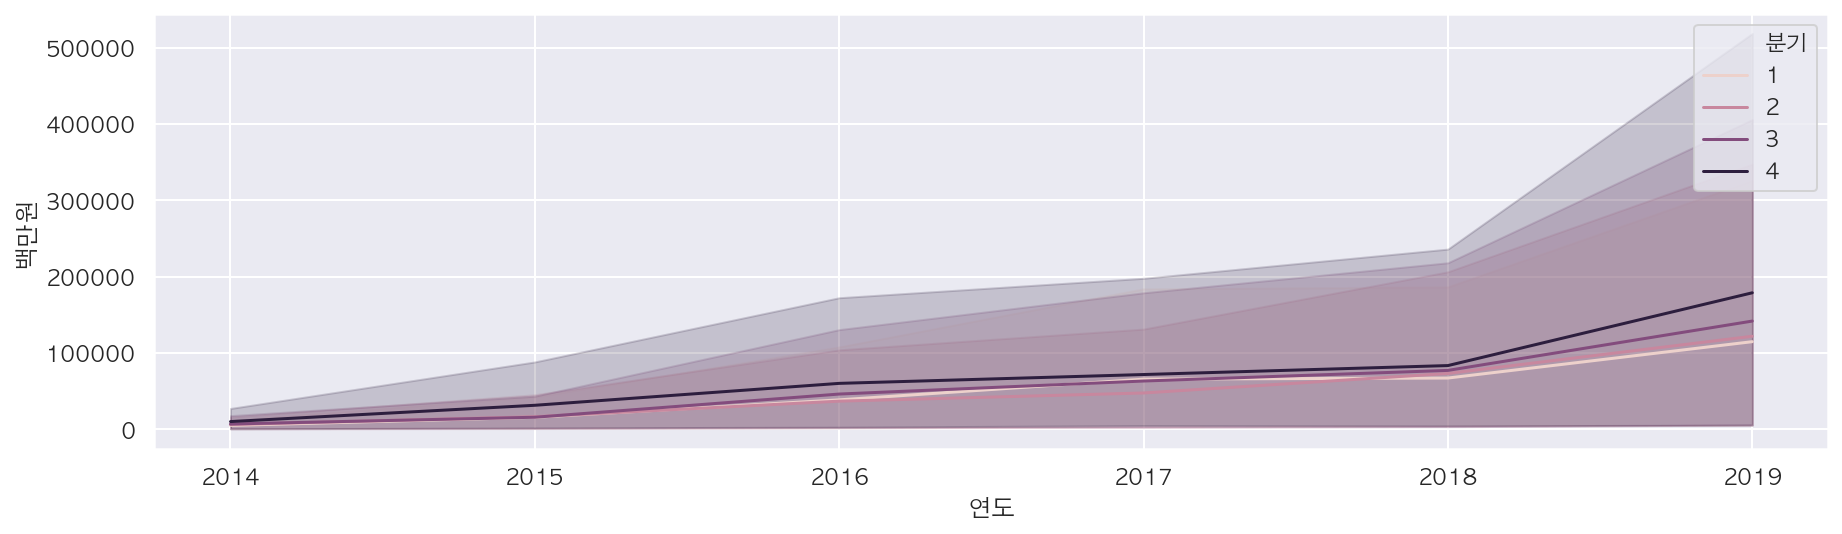

In [57]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_cosmetic, x="연도", y="백만원", hue="분기")

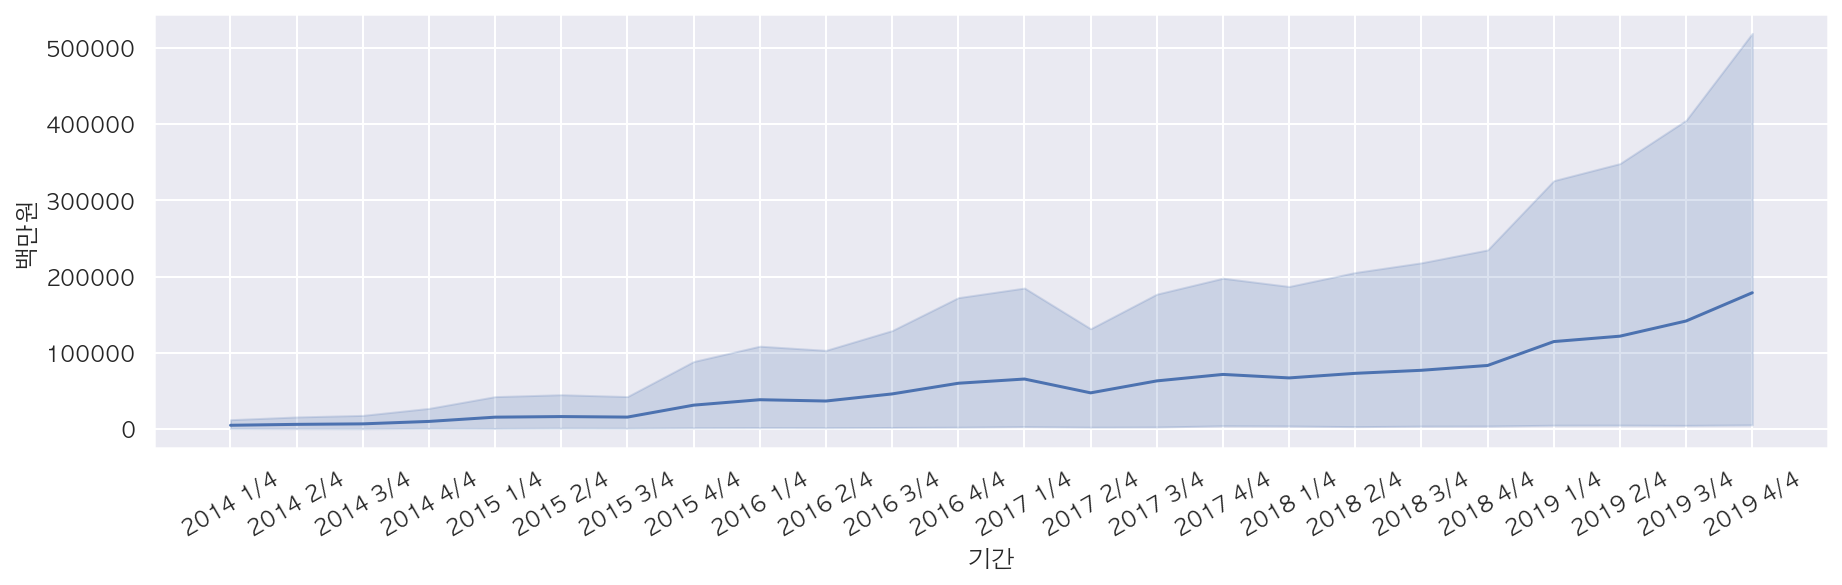

In [60]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x="기간", y="백만원")

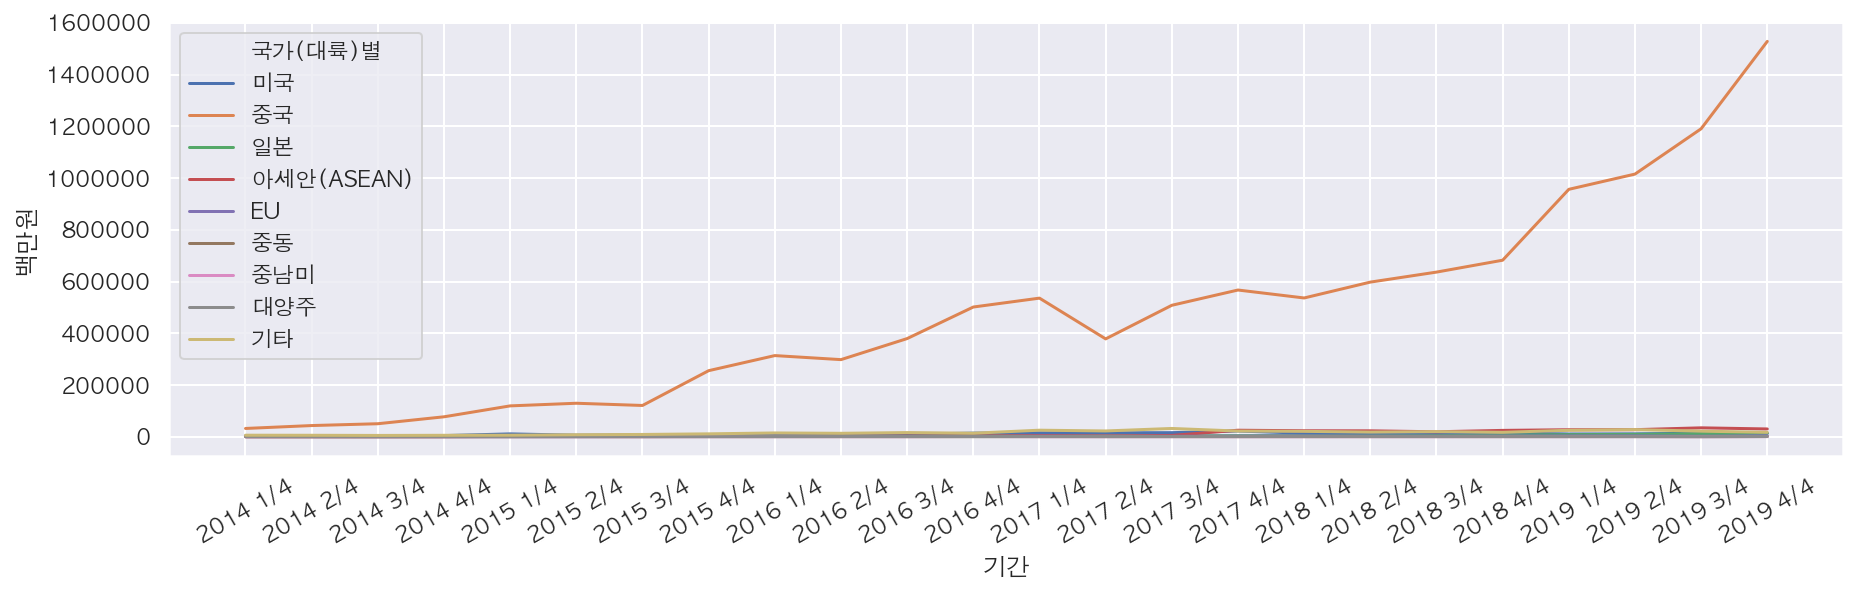

In [62]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x="기간", y="백만원", hue="국가(대륙)별")

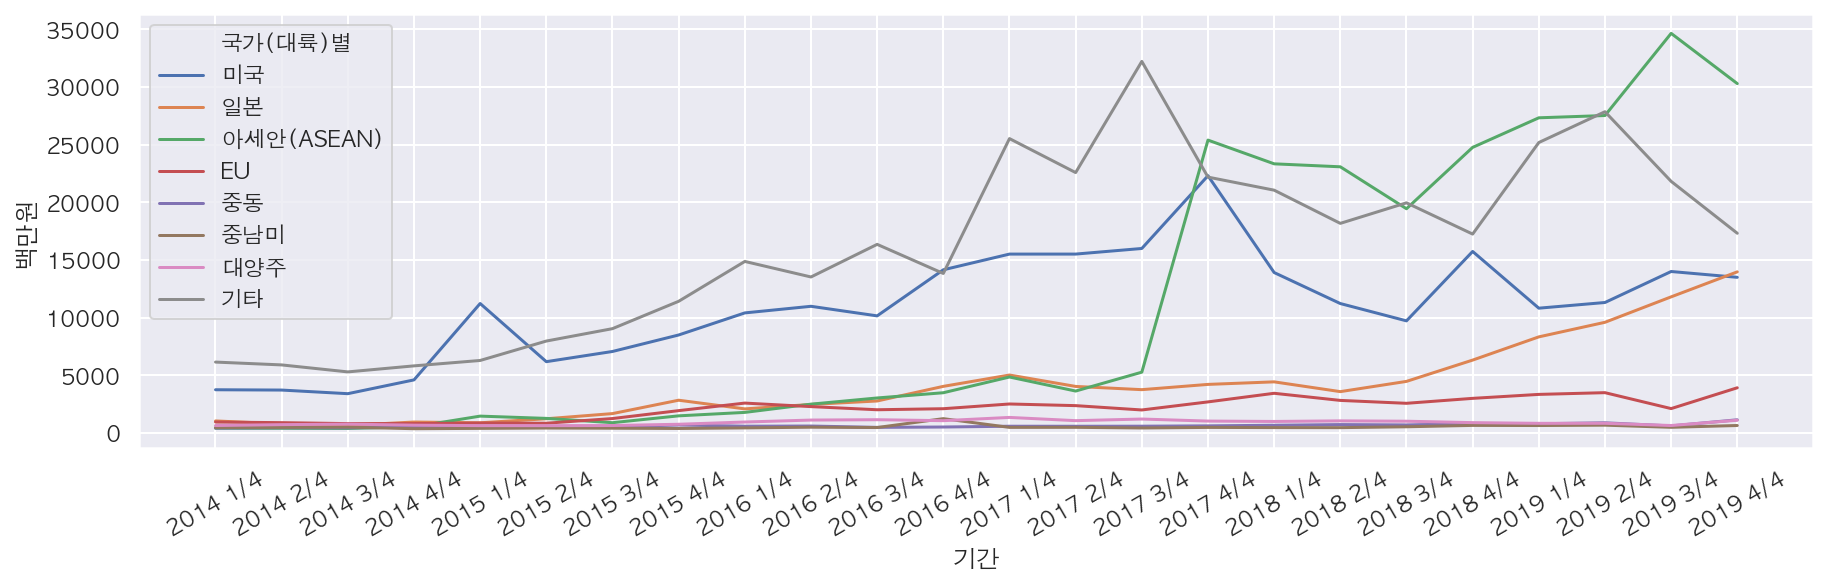

In [63]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic[df_cosmetic["국가(대륙)별"] != "중국"], x="기간", y="백만원", hue="국가(대륙)별")

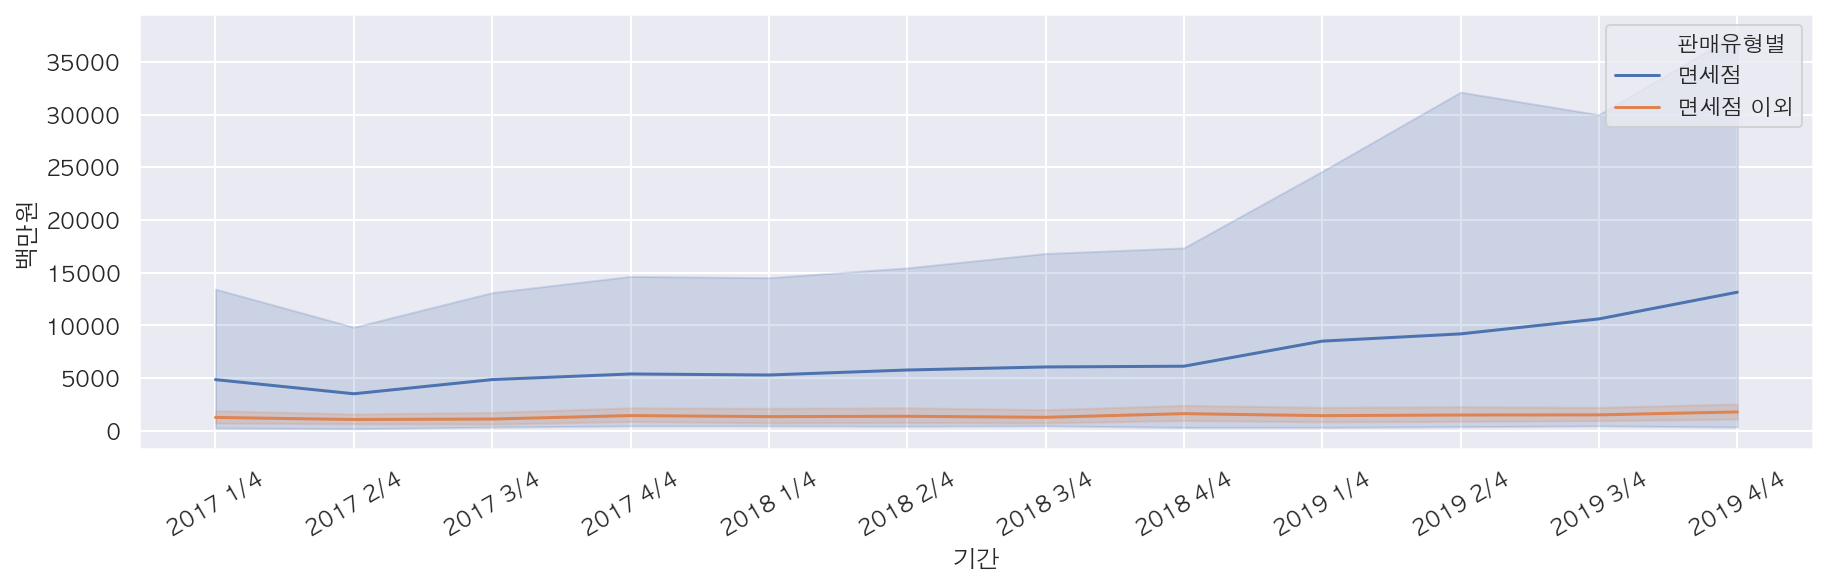

In [67]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
df_sub = df[df["판매유형별"] != "계"].copy()
sns.lineplot(data=df_sub, x="기간", y="백만원", hue="판매유형별")

## 의류 및 패션관련 상품 온라인쇼핑 해외직접판매액

In [70]:
df_fashion = df[(df["상품군별"] == "의류 및 패션관련 상품") & (df["판매유형별"] == "계")].copy()
df_fashion

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
66,미국,의류 및 패션관련 상품,계,2014 1/4,9810.0,2014,1
111,중국,의류 및 패션관련 상품,계,2014 1/4,12206.0,2014,1
156,일본,의류 및 패션관련 상품,계,2014 1/4,13534.0,2014,1
201,아세안(ASEAN),의류 및 패션관련 상품,계,2014 1/4,3473.0,2014,1
246,EU,의류 및 패션관련 상품,계,2014 1/4,1364.0,2014,1
...,...,...,...,...,...,...,...
10596,EU,의류 및 패션관련 상품,계,2019 4/4,862.0,2019,4
10641,중동,의류 및 패션관련 상품,계,2019 4/4,242.0,2019,4
10686,중남미,의류 및 패션관련 상품,계,2019 4/4,124.0,2019,4
10731,대양주,의류 및 패션관련 상품,계,2019 4/4,626.0,2019,4


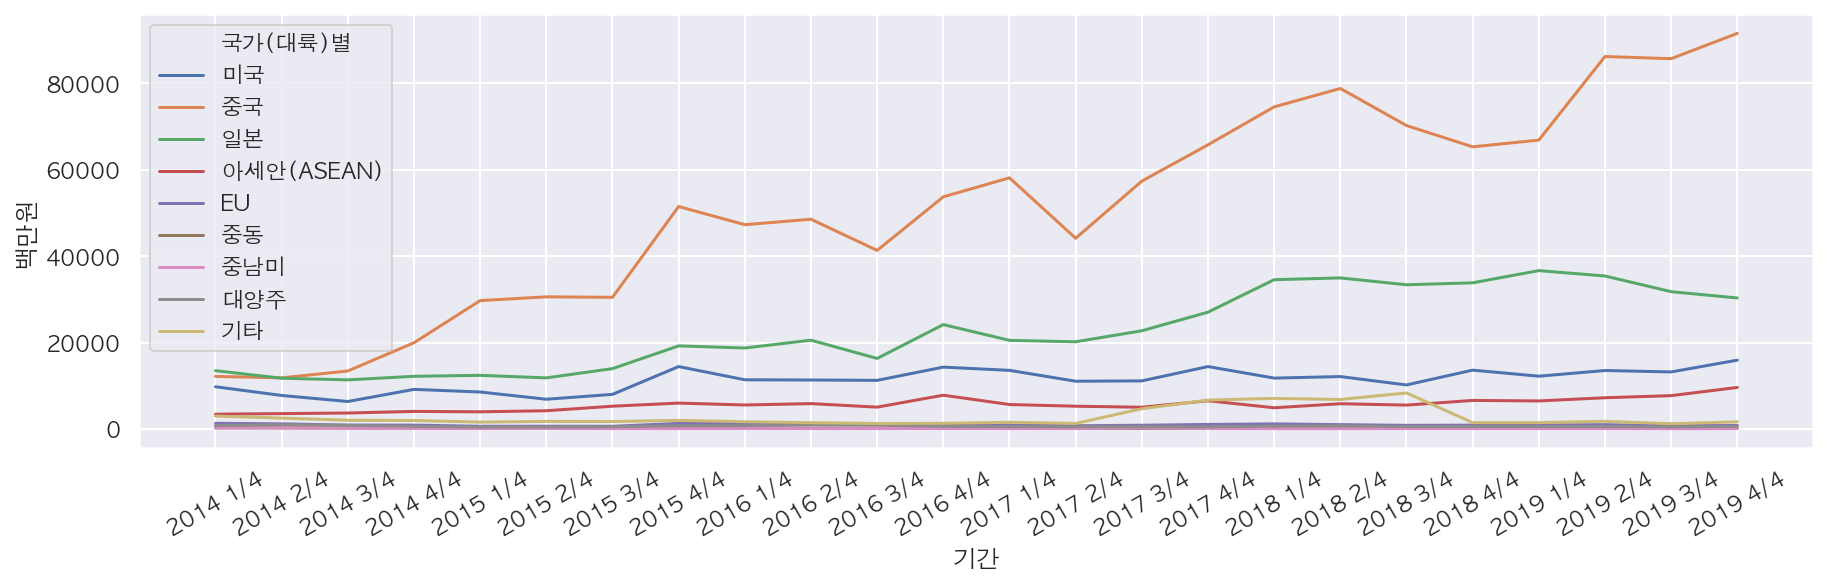

In [74]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion, x="기간", y="백만원", hue="국가(대륙)별")

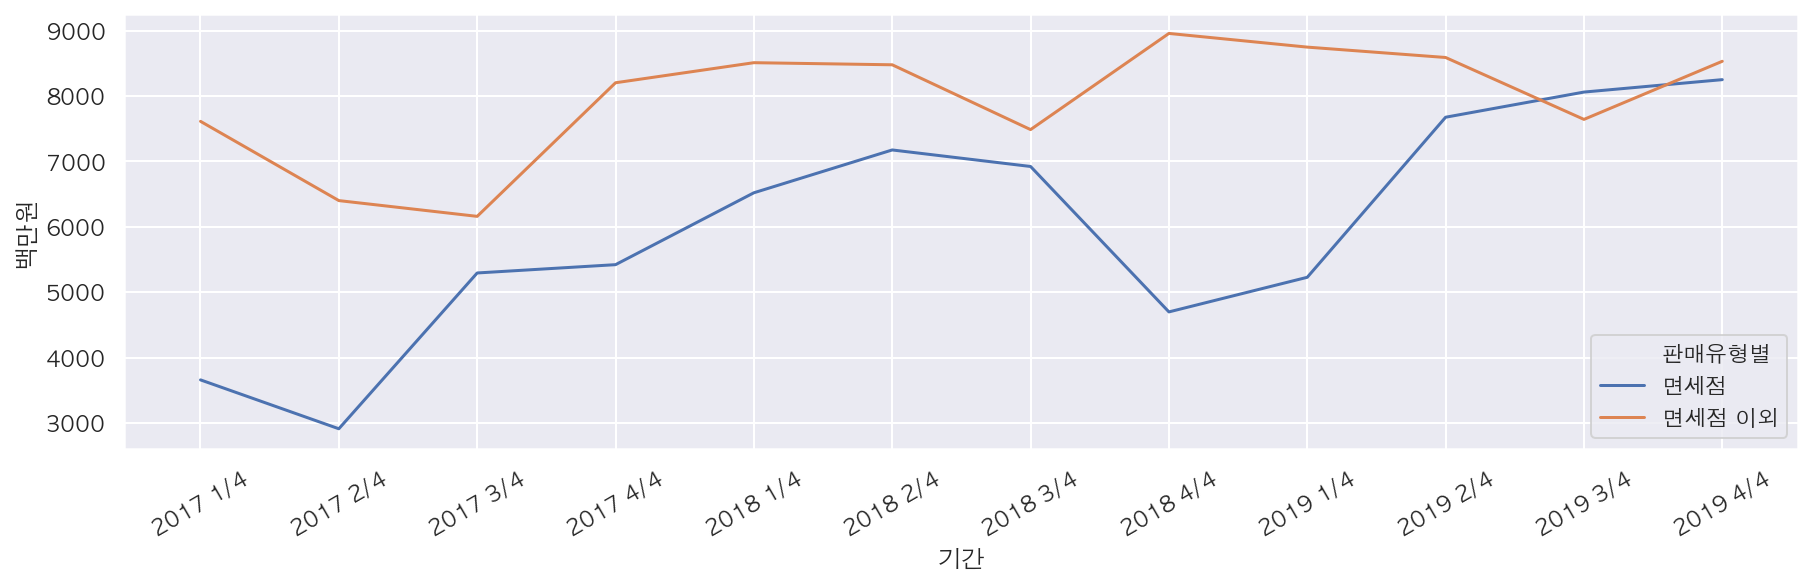

In [76]:
df_fashion2 = df[(df["상품군별"] == "의류 및 패션관련 상품") & (df["판매유형별"] != "계")].copy()

plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion2, x="기간", y="백만원", hue="판매유형별", ci=None)

## 데이터 집계하기

In [80]:
df_fashion

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
66,미국,의류 및 패션관련 상품,계,2014 1/4,9810.0,2014,1
111,중국,의류 및 패션관련 상품,계,2014 1/4,12206.0,2014,1
156,일본,의류 및 패션관련 상품,계,2014 1/4,13534.0,2014,1
201,아세안(ASEAN),의류 및 패션관련 상품,계,2014 1/4,3473.0,2014,1
246,EU,의류 및 패션관련 상품,계,2014 1/4,1364.0,2014,1
...,...,...,...,...,...,...,...
10596,EU,의류 및 패션관련 상품,계,2019 4/4,862.0,2019,4
10641,중동,의류 및 패션관련 상품,계,2019 4/4,242.0,2019,4
10686,중남미,의류 및 패션관련 상품,계,2019 4/4,124.0,2019,4
10731,대양주,의류 및 패션관련 상품,계,2019 4/4,626.0,2019,4


In [82]:
result = df_fashion.pivot_table(index="국가(대륙)별", columns="연도",
                                values="백만원", aggfunc="sum")

result

연도,2014,2015,2016,2017,2018,2019
국가(대륙)별,,,,,,
EU,4485.0,3374.0,4899.0,3736.0,4114.0,3694.0
기타,9683.0,7248.0,5918.0,14387.0,23901.0,6309.0
대양주,3392.0,2349.0,3401.0,2266.0,2725.0,2387.0
미국,33223.0,38066.0,48451.0,50353.0,47875.0,55035.0
아세안(ASEAN),14936.0,19639.0,24478.0,22671.0,23068.0,31217.0
일본,48960.0,57594.0,79905.0,90584.0,136800.0,134243.0
중국,57531.0,142339.0,190932.0,225407.0,288848.0,330254.0
중남미,975.0,616.0,649.0,762.0,576.0,543.0
중동,1172.0,1018.0,968.0,772.0,879.0,924.0


## 연산결과를 시각적으로 보기

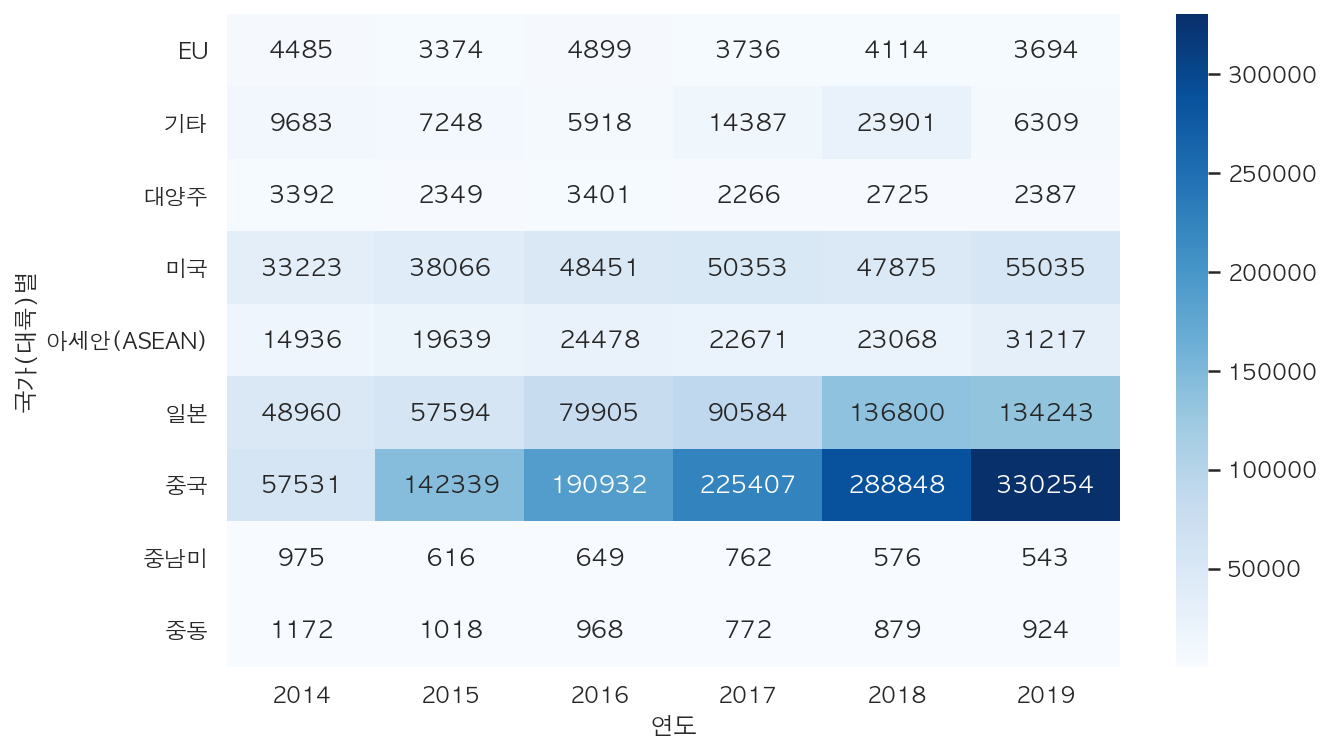

In [86]:
plt.figure(figsize=(10, 6))
sns.heatmap(result, cmap="Blues", annot=True, fmt=".0f")

# 전체 상품군별로 온라인쇼핑 해외직접판매액은 증가했을까?

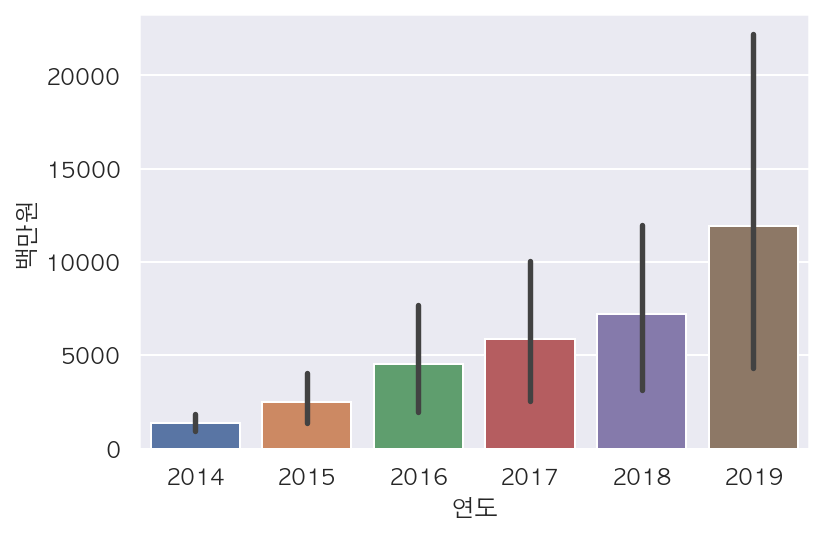

In [88]:
sns.barplot(data=df_total, x="연도", y="백만원")

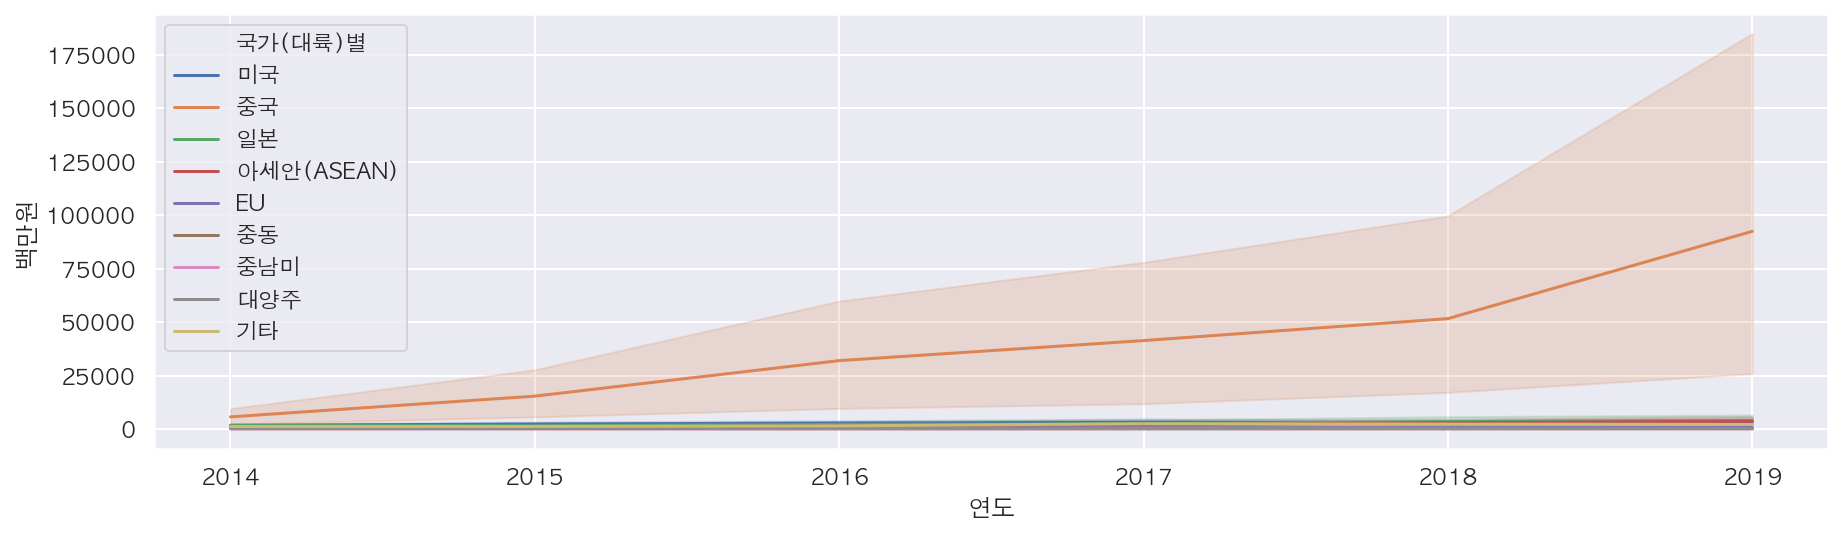

In [91]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_total, x="연도", y="백만원", hue="국가(대륙)별")

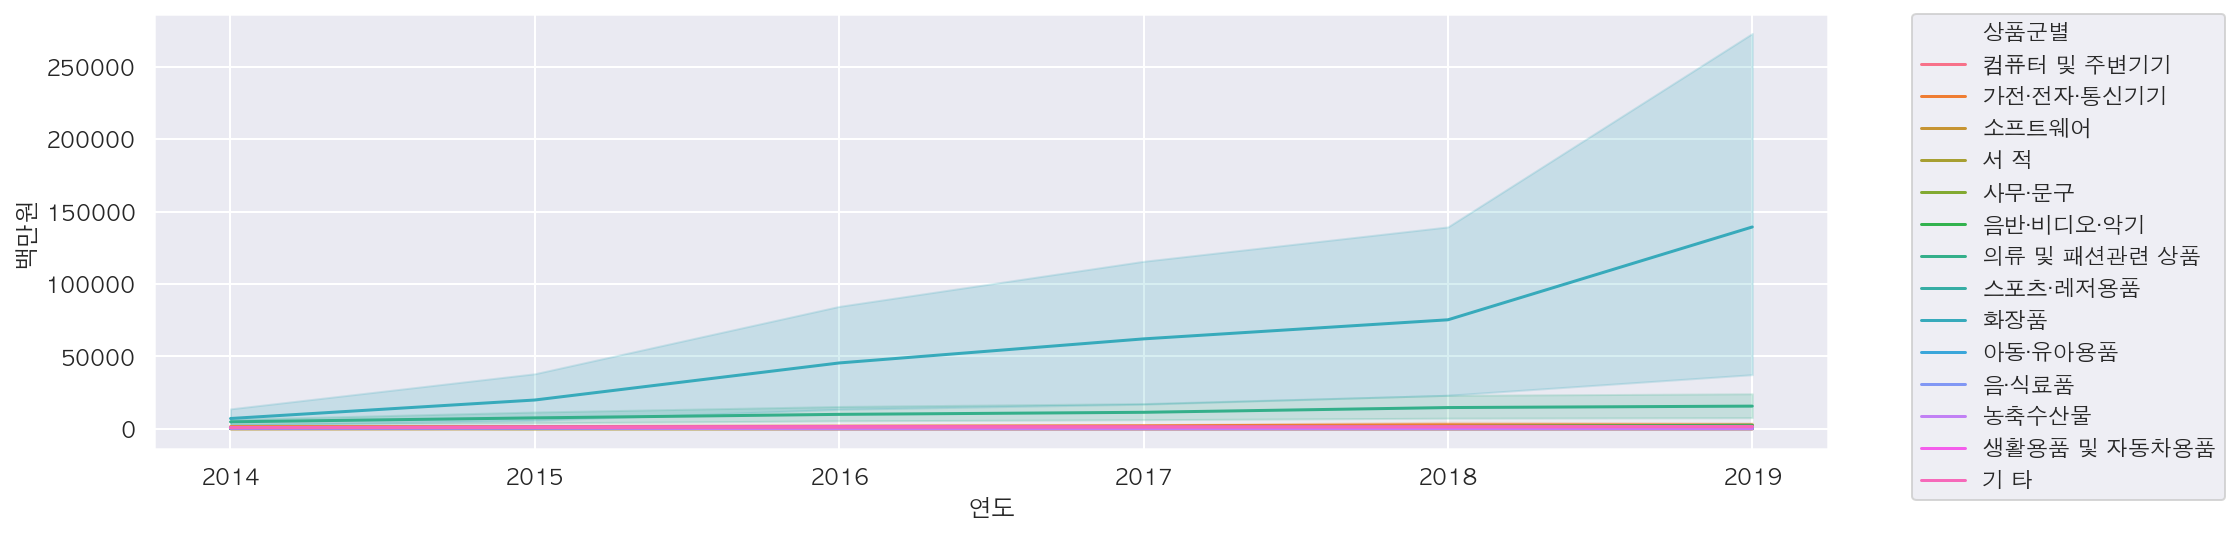

In [94]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_total, x="연도", y="백만원", hue="상품군별")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)